In [91]:
# 数据集读入
import numpy as np
from sklearn.datasets import load_iris


iris_dataset = load_iris()
print(dir(iris_dataset))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


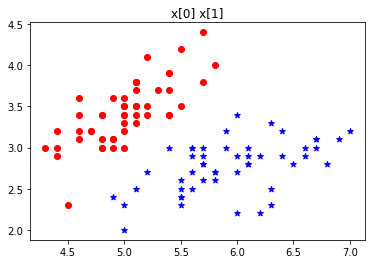

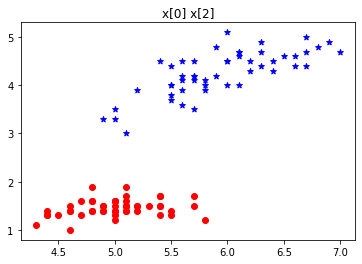

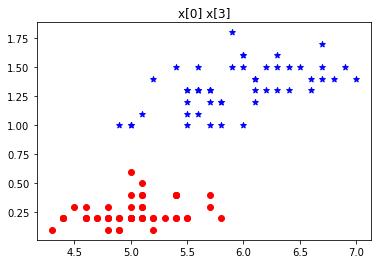

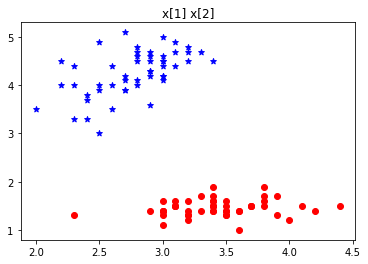

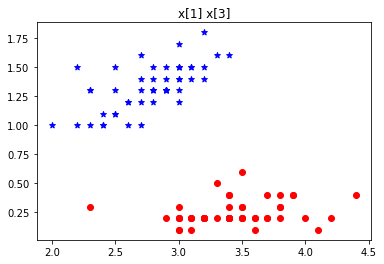

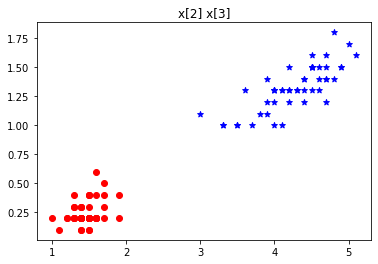

In [92]:
# 数据处理

X = iris_dataset['data']
Y = iris_dataset['target']
# 只取类型为0、1的前两种花卉数据, 共100组
x = X[Y<2]
y  = Y[Y<2]

# 画出各参数间关系
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(4):
    for j in range(i+1,4):
        plt.figure()
        plt.title("x[%d] x[%d]"%(i,j))
        plt.scatter(x[y==0,i],x[y==0,j],color = 'r',marker='o')
        plt.scatter(x[y==1,i],x[y==1,j],color = 'b',marker='*')
        plt.show()


In [93]:
# X选取第一列和第二列, 并对数据切分

x = x[:,:2]

from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

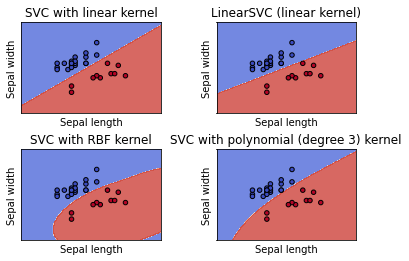

In [96]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(x_train, y_train) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x_test[:, 0], x_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()